In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

## Pacemakers-driven network

In [17]:
N = 50
P = 20
GC = 200
DENSITY = .3
TMAX = 1000
T_REF = .1

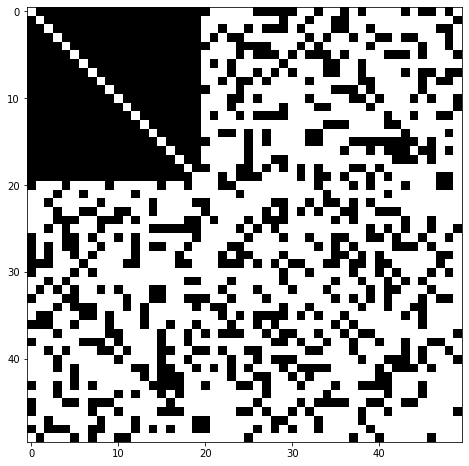

In [18]:
# define edges
edges = []
for i in range(P):
    for j in range(i+1, P):
        edges.append((i ,j))
        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction')

# display connection matrix
ntwk.disp_conn_mat()

In [19]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [01:09<00:00, 1431.31it/s]


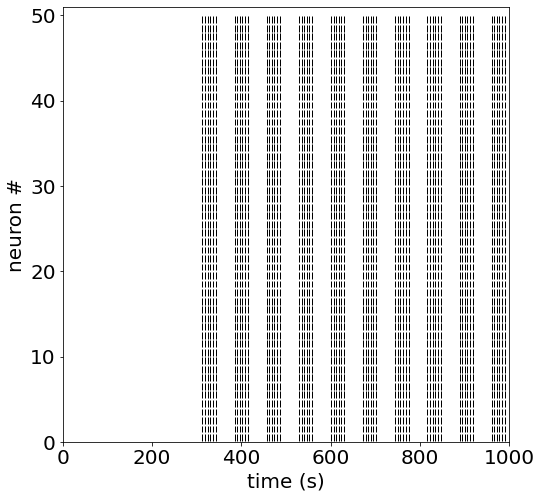

In [22]:
ntwk.disp(figsize=(8, 8), style='spike')

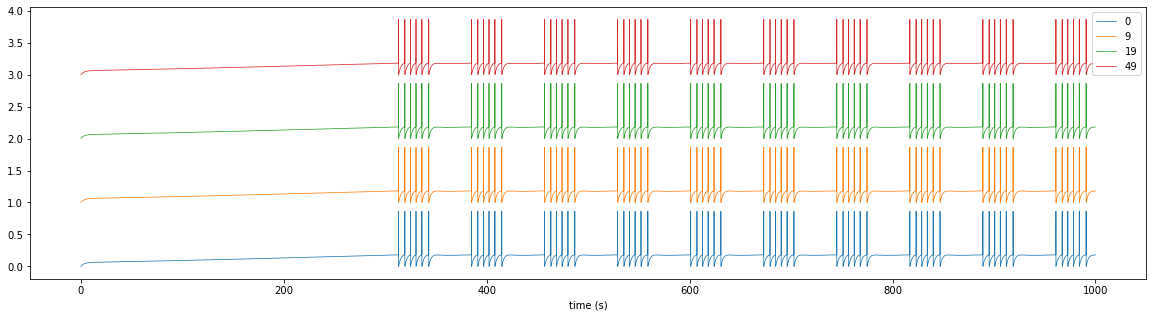

In [21]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()

In [47]:
# Test external stimulation
ntwk = Network(num=N, edges=edges, gc=200, tmax=100, pacemakers=range(P), conn_type='gap_junction')
ntwk.i_stim = 100000
ntwk.t_stim = 1
ntwk.run(stim={20: [25] })

100%|██████████| 9999/9999 [00:06<00:00, 1433.66it/s]


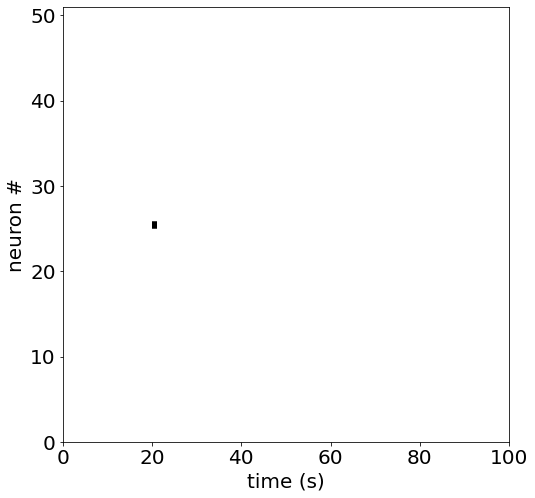

In [48]:
ntwk.disp(figsize=(8, 8), style='spike')

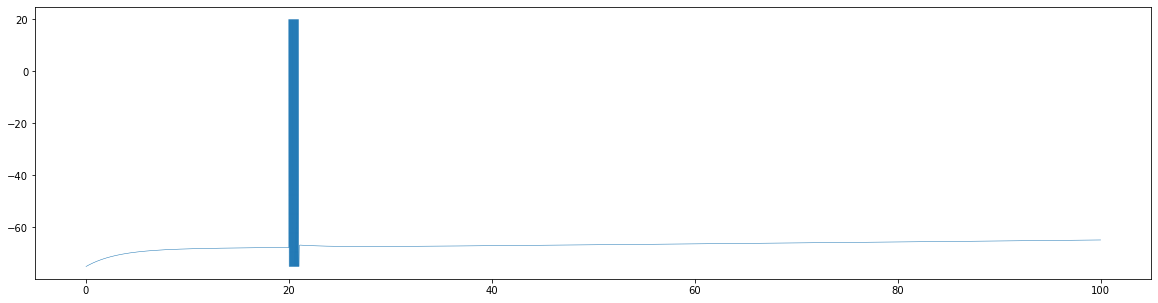

In [49]:
plt.figure(figsize=(20, 5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, ntwk.neurons[25].v_train, lw=.5)
plt.show()

## Distributed network

In [4]:
N = 50
GC = 200 # 100
DENSITY = .3
TMAX = 1000
T_REF = .1
WNOISE = 5000

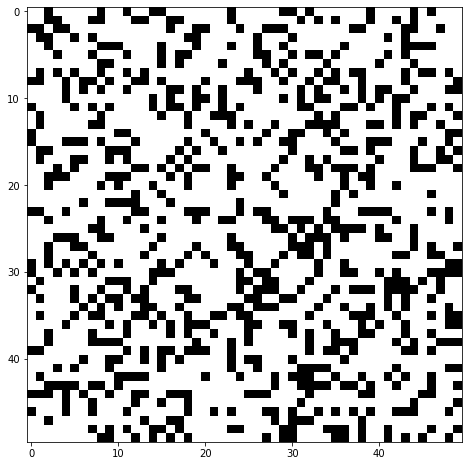

In [5]:
# define edges
edges = []        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(N), conn_type='gap_junction', wnoise=WNOISE)

# display connection matrix
ntwk.disp_conn_mat()

In [6]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [01:01<00:00, 1638.79it/s]


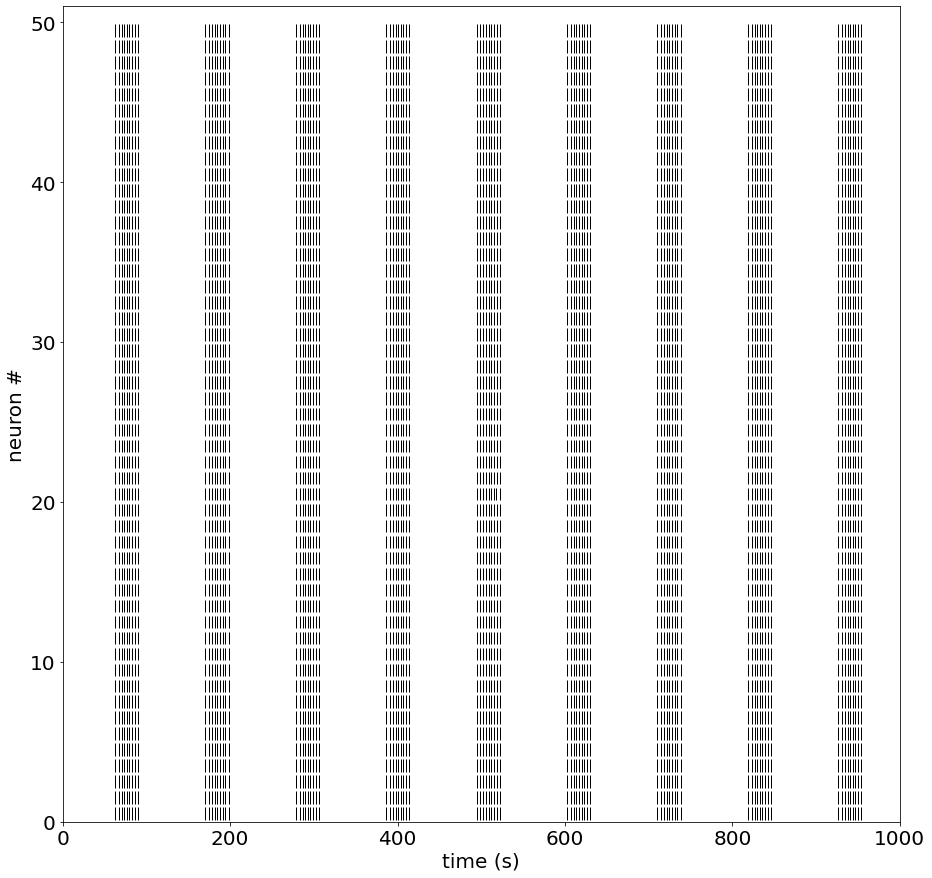

In [7]:
ntwk.disp(figsize=(15, 15), style='spike', savefig='./output/randnet_gc20.png')

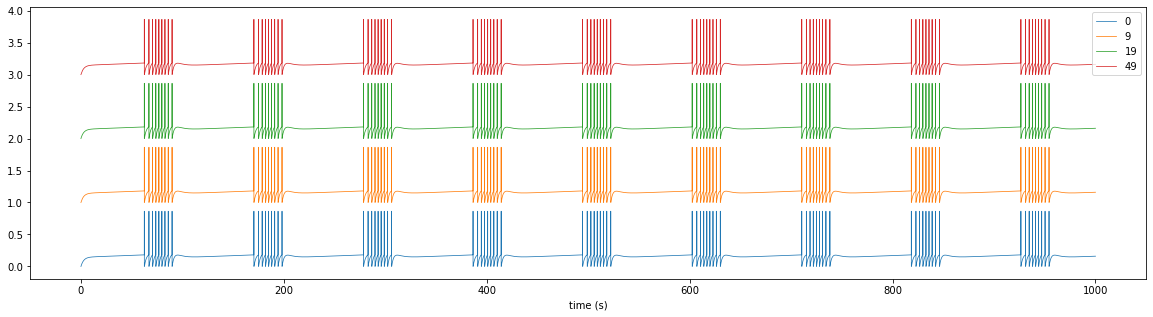

In [8]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()

In [13]:
# Test external stimulation
ntwk = Network(num=N, edges=edges, gc=GC, tmax=100, pacemakers=range(N), conn_type='gap_junction', wnoise=WNOISE)
ntwk.i_stim = 10000
ntwk.t_stim = 1
ntwk.run(stim={20: [25] })

100%|██████████| 9999/9999 [00:06<00:00, 1628.84it/s]


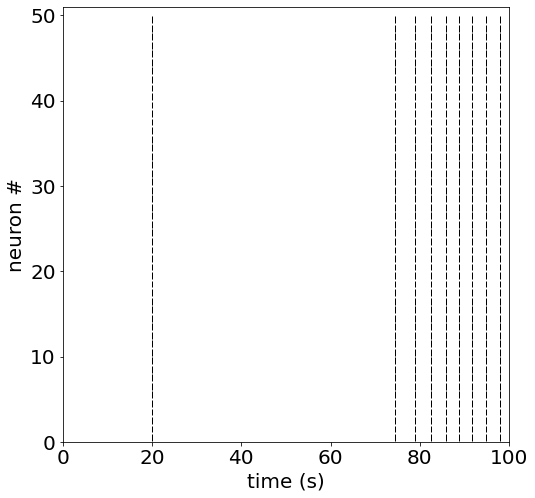

In [15]:
ntwk.disp(figsize=(8, 8), style='spike')

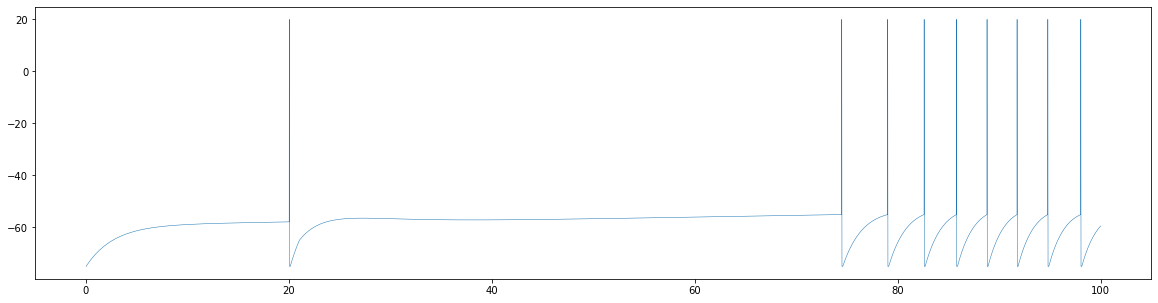

In [16]:
plt.figure(figsize=(20, 5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, ntwk.neurons[23].v_train, lw=.5)
plt.show()

## Semi-pacemakers driven network

In [36]:
N = 50
P = 5
GC = 20 # 100 # 20
DENSITY = .3
TMAX = 2000
T_REF = .1
WNOISE= 5000

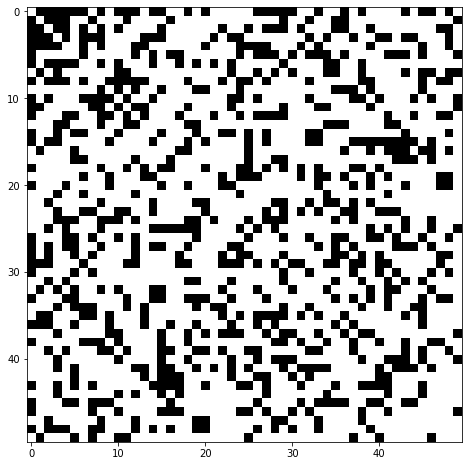

In [37]:
# define edges
edges = []
for i in range(P):
    for j in range(i+1, P):
        edges.append((i ,j))
        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction', wnoise=WNOISE, is_semi_pm=True)

# display connection matrix
ntwk.disp_conn_mat()

In [38]:
# run the simulation
ntwk.run()

100%|██████████| 199999/199999 [01:57<00:00, 1701.10it/s]


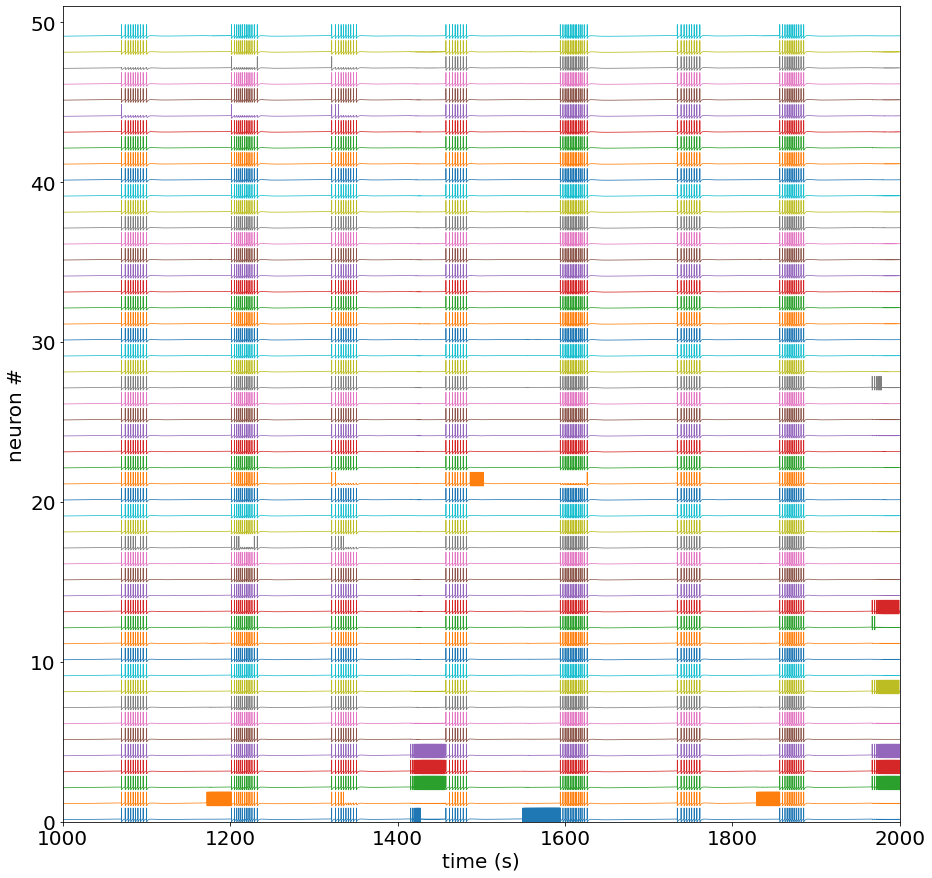

In [39]:
ntwk.disp(figsize=(15, 15), style='trace', savefig='./output/semipm_gc20.png')

In [ ]:
plt.figure(figsize=(20,5))
time_axis = np.arange(0, ntwk.tmax, ntwk.dt)
plt.plot(time_axis, adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(time_axis, adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(time_axis, adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(time_axis, adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.xlabel('time (s)')
plt.show()